In [12]:
import pandas as pd
import geopandas as gpd 
import os
import numpy

In [14]:
path_shapefile = r"C:\Users\alebe\Documents\3Dplotting_houses\resources\DSM_nl_unzip\one\DHMVII_vdc_k01.shp"
shape_file = gpd.read_file(path_shapefile)

DriverError: C:\Users\alebe\Documents\3Dplotting_houses\resources\DSM_nl_unzip\one\DHMVII_vdc_k01.shp: No such file or directory

In [6]:
shape_file

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


In [7]:
print(type(shape_file))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [9]:
shape_file.shape

(3, 4)

In [10]:
df1 = shape_file["geometry"]

In [11]:
df1

0    MULTIPOLYGON Z (((162079.010 238604.770 0.000,...
1    POLYGON Z ((148803.300 243432.780 0.000, 14882...
2    MULTIPOLYGON Z (((156554.470 243736.800 0.000,...
Name: geometry, dtype: geometry

In [13]:
df1.to_numpy()

array([<shapely.geometry.multipolygon.MultiPolygon object at 0x0000023E675470A0>,
      dtype=object)

In [43]:
shape_file_2 = gpd.read_file(r"C:\Users\alebe\Documents\3Dplotting_houses\resources\DSM_nl_unzip\DSM_NL_02\DHMVII_vdc_k02")
shape_file_2

,Date,OpnDatum1,OpnDatum2,geometry
0,20140129,2014-01-29,None,"MULTIPOLYGON (((179000.000 250000.000, 179000...."
1,20140130,2014-01-29,2014-01-30,"MULTIPOLYGON (((163129.570 245991.310, 163134...."
2,20140130,2014-01-30,None,"MULTIPOLYGON (((186898.890 245675.080, 186912...."
3,20140131,2014-01-30,2014-01-31,"MULTIPOLYGON (((162674.340 244285.030, 162723...."
4,20140131,2014-01-31,None,"POLYGON ((178423.360 243934.510, 178436.570 24..."
5,20140202,2014-01-31,2014-02-02,"POLYGON ((182501.420 241115.160, 182544.540 24..."
6,20140202,2014-02-02,None,"POLYGON ((175723.990 240819.240, 175725.710 24..."


In [31]:
shape_file_2.total_bounds_bounds

array([162000.00012207, 238000.00012207, 194000.00012207, 250000.00012207])

In [34]:
shape_file_2.geom_type

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4         Polygon
5         Polygon
6         Polygon
dtype: object

AttributeError: module 'matplotlib' has no attribute 'show'

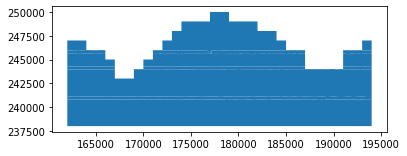

In [41]:
import matplotlib as plt
# fig, ax = plt.subplots(figsize = (10,10))
shape_file_2.plot()
plt.show()

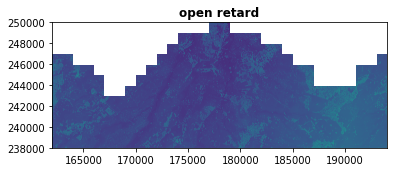

C:\Users\alebe\Documents\3Dplotting_houses\resources\DSM_nl_unzip\DSM_NL_02\GeoTIFF\DHMVIIDSMRAS1m_k02.tif


In [60]:
import rasterio 
import rasterio.plot 
import os
from pathlib import Path

file_path = os.path.join(os.path.abspath(''), Path("resources\DSM_nl_unzip\DSM_NL_02\GeoTIFF\DHMVIIDSMRAS1m_k02.tif"))
tiff = rasterio.open(file_path)
rasterio.plot.show(tiff, title="open retard")
print(file_path)


In [61]:
type(tiff)

rasterio.io.DatasetReader

In [62]:
tiff.shape

(12000, 32000)

In [63]:
tiff

<open DatasetReader name='C:/Users/alebe/Documents/3Dplotting_houses/resources/DSM_nl_unzip/DSM_NL_02/GeoTIFF/DHMVIIDSMRAS1m_k02.tif' mode='r'>

In [66]:
tiff.count

1

In [67]:
tiff.bounds

BoundingBox(left=162000.0, bottom=238000.0, right=194000.0, top=250000.0)

In [68]:
tiff.width

32000

In [74]:
from osgeo import osr, gdal
ds = gdal.Open(file_path)
old_cs = osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

0

In [79]:
gdal.Info(file_path, deserialize=False)

'Driver: GTiff/GeoTIFF\nFiles: C:\\Users\\alebe\\Documents\\3Dplotting_houses\\resources\\DSM_nl_unzip\\DSM_NL_02\\GeoTIFF\\DHMVIIDSMRAS1m_k02.tif\nSize is 32000, 12000\nCoordinate System is:\nPROJCRS["BD72 / Belgian Lambert 72",\n    BASEGEOGCRS["BD72",\n        DATUM["Reseau National Belge 1972",\n            ELLIPSOID["International 1924",6378388,297,\n                LENGTHUNIT["metre",1]]],\n        PRIMEM["Greenwich",0,\n            ANGLEUNIT["degree",0.0174532925199433]],\n        ID["EPSG",4313]],\n    CONVERSION["Belgian Lambert 72",\n        METHOD["Lambert Conic Conformal (2SP)",\n            ID["EPSG",9802]],\n        PARAMETER["Latitude of false origin",90,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8821]],\n        PARAMETER["Longitude of false origin",4.36748666666667,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8822]],\n        PARAMETER["Latitude of 1st standard parallel",51.1666672333333,\n            AN